In [1]:
import matlab
import matlab.engine
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

![iamge](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q1.PNG)

In [15]:
#######################################################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q2.PNG)

In [ ]:
# Assets A1.A2.A3

In [75]:
m = np.array([[0.10],[0.20],[0.15]]) # construct matrix

C = np.array([[0.005,-0.010,0.004],[-0.010,0.040,-0.002],[0.004,-0.002,0.023]]) # construct matrix

E = np.zeros((100,1))   # Expected return E from the portfoli
V = np.zeros((100,1))   # Variance
w = np.zeros((100,3))   # Weight

N = 100
y = random.rand(N,3)  # 100X3 random matrix between 0~1
for i in range (0,N):
    # calculate the weight
    w[i] = y[i,] / sum(y[i,]) 
    # calculate the expected return
    E[i] = np.dot(w[i] , m)  
    # calculate the Variance
    kk = np.dot(w[i] , C)
    w_T = np.reshape(w[i], (3, -1)) #transposition
    V[i] = np.sqrt(np.dot(kk , w_T))

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/S1.PNG)

In [4]:
eng = matlab.engine.start_matlab("-desktop") # Use Finance toolbox in Matlab to calculate the Efficient Portfolio

p = Portfolio;

p = setAssetMoments(p, m, C);

p = setDefaultConstraints(p);

[y,x] = plotFrontier(p);

In [80]:
# obtain data from matlab
x1 = eng.workspace['x']
y1 = eng.workspace['y']

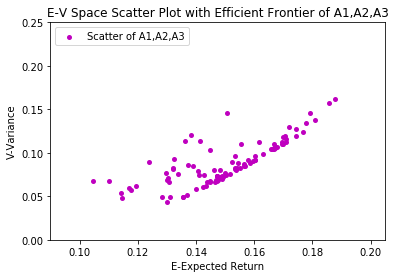

In [81]:
f1 = plt.figure(1)
#plt.plot(x,y, linewidth = '2', label = "Efficient Frontier of A1,A2,A3")
plt.scatter(E,V, c='m', marker='.', linewidths= '2', label = "Scatter of A1,A2,A3")
plt.legend(loc='upper left')
#plt.grid()
plt.title('E-V Space Scatter Plot with Efficient Frontier of A1,A2,A3')  
plt.ylabel("V-Variance")  
plt.xlabel("E-Expected Return")
# plt with same scale
plt.ylim(0,0.25)
plt.xlim(0.09,0.205)
plt.savefig("E-V Space Scatter Plot of A1,A2,A3.PNG", dpi = 600)
plt.show()

In [52]:
# Assets A1.A2

In [82]:
# obtain data from matlab
x2 = eng.workspace['x']
y2 = eng.workspace['y']

In [65]:
# Assets A2.A3

In [83]:
# obtain data from matlab
x3 = eng.workspace['x']
y3 = eng.workspace['y']

In [ ]:
# Assets A1.A3

In [84]:
# obtain data from matlab
x4 = eng.workspace['x']
y4 = eng.workspace['y']

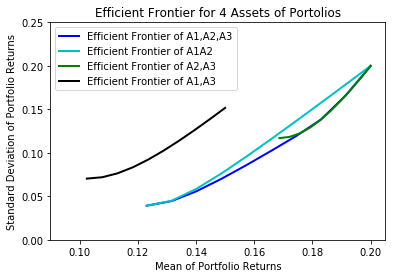

In [91]:
f2 = plt.figure(2)
plt.plot(x1,y1, linewidth = '2', color='b', label = "Efficient Frontier of A1,A2,A3")
plt.plot(x2,y2, linewidth = '2', color='c', label = "Efficient Frontier of A1A2")
plt.plot(x3,y3, linewidth = '2', color='g', label = "Efficient Frontier of A2,A3")
plt.plot(x4,y4, linewidth = '2', color='k', label = "Efficient Frontier of A1,A3")
#plt.grid()
plt.legend(loc='upper left')
plt.title('Efficient Frontier for 4 Assets of Portolios')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
plt.ylim(0,0.25)
plt.xlim(0.09,0.205)
plt.savefig("Efficient Frontier for 4 Assets of Portolios.PNG", dpi = 600)
plt.show()

In [43]:
######################################################################################################################################3

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q3.PNG)

Set the working path of Matlab to cvx in Matlab install address, Run **vsx_setup.m**

**[NaiveMV](https://github.com/Trouble404/Computational-Finance-coursework/blob/master/NativeMV.m)** To **[NaiveMV_CVX](https://github.com/Trouble404/Computational-Finance-coursework/blob/master/NativeMV_CVX.m)**

Call **linprog** and **quadprog** by **CVX**

MaxReturnWeights = linprog(-ERet, [], [], V1, 1, V0) To: 
![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/linprog_cvx.PNG)

MinVarWeights = quadprog(ECov,V0,[],[],V1,1,V0,[],[],options)  To:
![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/quadprog_csv.PNG)

Running this two function by m and C in Q2


In [52]:
# obtain data from matlab
x5 = eng.workspace['PRoR1']
y5 = eng.workspace['PRisk1']
x6 = eng.workspace['PRoR2']
y6 = eng.workspace['PRisk2']
x7 = eng.workspace['D1']
y7 = eng.workspace['D2']

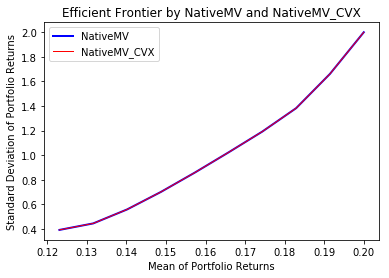

In [70]:
f3 = plt.figure(3)
plt.plot(x5,y5, linewidth = '2', color='b', label = "NativeMV")
plt.plot(x6,y6, linewidth = '1', color='r', label = "NativeMV_CVX")
#plt.grid()
plt.legend(loc='upper left')
plt.title('Efficient Frontier by NativeMV and NativeMV_CVX')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Efficient Frontier by NativeMV and NativeMV_CVX.PNG", dpi = 600)
plt.show()

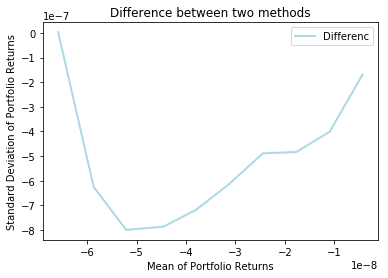

In [71]:
f4 = plt.figure(4)
plt.plot(x7,y7, linewidth = '2', color='lightblue', label = "Differenc")
#plt.grid()
plt.legend(loc='upper right')
plt.title('Difference between two methods')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Difference between two methods.PNG", dpi = 600)
plt.show()

In [92]:
eng.quit()